<a href="https://colab.research.google.com/github/jjschueder/7331DataMiningNotebooks/blob/master/Mini-Project%20SVMLR%20Classification/(V2)Mini-Project%20SVMLR%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project: SVM&LR Classification
You are to perform predictive analysis (classification) upon a data set: model the dataset using
methods we have discussed in class: logistic regression & support vector machines and making
conclusions from the analysis. Follow the CRISP-DM framework in your analysis (you are not
performing all of the CRISP-DM outline, only the portions relevant to the grading rubric outlined
below). This report is worth 10% of the final grade. You may complete this assignment in teams
of as many as three people.
Write a report covering all the steps of the project. The format of the document can be PDF,
*.ipynb, or HTML. You can write the report in whatever format you like, but it is easiest to turn in
the rendered Jupyter notebook. The results should be reproducible using your report. Please
carefully describe every assumption and every step in your report.
A note on grading: A common mistake I see in this lab is not investigating different input
parameters for each model. Try a number of parameter combinations and discuss how the model changed. 

## SVM and Logistic Regression Modeling


### Create Models [50 points] 
Create a logistic regression model and a support vector machine model for the
classification task involved with your dataset. Assess how well each model performs (use
80/20 training/testing split for your data). Adjust parameters of the models to make them
more accurate. If your dataset size requires the use of stochastic gradient descent, then
linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing
logistic regression and linear support vector machines. For many problems, SGD will be
required in order to train the SVM model in a reasonable timeframe.   

### Load and Clean Data Set

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
#read data from github repository
#this data was produced from the Iowa Alcohol Dataset 2019 year data
#It was cleansed and transformed in this notebook and exported as a csv to github for use here.
#source python notebook: https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/lab1/msds7331_clark_schueder_vela_washburn.ipynb
# read csv from github directly
url_dataset = 'https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/Live%20Assignment%201/df1hotmerge2.csv?raw=true'
#df = pd.read_csv(url_dataset, nrows=50000)
data = pd.read_csv(url_dataset)
#, nrows=100000)

In [3]:
print(data.shape)
print(list(data.columns))

(400000, 68)
['Unnamed: 0', 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'counter', 'liquor_category', 'store_parent', 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'liquor_category_WHISKY', 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'year_2019', 'monthyear_Apr-2019', 'monthyear_Aug-2019', 'monthyear_De

In [4]:
data = data.drop(columns = ['Unnamed: 0'])
count_not_whiskey = len(data[data['liquor_category_WHISKY']==0])
count_whiskey = len(data[data['liquor_category_WHISKY']==1])
pct_of_no_whiskey = count_not_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of not whiskey is", pct_of_no_whiskey*100)
pct_of_whiskey = count_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of whiskey", pct_of_whiskey*100)

percentage of not whiskey is 89.56125
percentage of whiskey 10.438749999999999


In [5]:
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 
 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 
 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep=['sale_dollars_trans', 'cost_per_liter_trans',
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack', 'bottle_volume_ml',
       'liquor_category_WHISKY']
data_final=data[to_keep]
data_final.columns.values

array(['sale_dollars_trans', 'cost_per_liter_trans',
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack', 'bottle_volume_ml',
       'liquor_category_WHISKY'], dtype=object)

In [6]:
X = data_final.loc[:, data_final.columns != 'liquor_category_WHISKY']
y = data_final.loc[:, data_final.columns == 'liquor_category_WHISKY']

In [7]:
X.head()

,sale_dollars_trans,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,pack,bottle_volume_ml
0,4.750136,2.735233,1.348073,2.995732,2.014903,20,375
1,2.574900,5.570632,2.169054,0.000000,-2.995732,8,50
2,5.000585,3.208825,2.803360,1.791759,1.791759,12,1000
3,6.636261,3.745890,3.052585,3.178054,2.890372,6,750
4,5.121819,2.077296,2.231089,2.484907,3.044522,6,1750


### SGD

In [8]:
%%time
# now divide the data into test and train using scikit learn built-ins
from sklearn.model_selection import StratifiedShuffleSplit 
cv = StratifiedShuffleSplit( n_splits=1,test_size=0.8)
# use some compact notation for creating a linear SVM classifier with stochastic descent
from sklearn.linear_model import SGDClassifier
regularize_const = 0.1
iterations = 5

# use some compact notation for creating a logistic regression classifier with stochastic descent
log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

Wall time: 104 µs


In [9]:
from sklearn import metrics as mt
for train_idx, test_idx in cv.split(X,y):
    log_sgd.fit(scl.fit_transform(X.iloc[train_idx]),y.iloc[train_idx])
    yhat = log_sgd.predict(scl.transform(X.iloc[test_idx]))
    
    conf = mt.confusion_matrix(y.iloc[test_idx],yhat)
    acc = mt.accuracy_score(y.iloc[test_idx],yhat)

print('Logistic Regression:', acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression: 0.8911625


In [10]:
conf

array([[284479,   2117],
       [ 32711,    693]], dtype=int64)

## Logistic Regression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics#### Logistic Regression model:

### Model 1

In [11]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns


from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = linear_model.LogisticRegressionCV( Cs=100)# class_weight = 'balanced')

logisticRegr.fit(X_train, y_train)

coef = logisticRegr.coef_[0]
classes = logisticRegr.classes_[0]
intercept = logisticRegr.intercept_[0]
print (coef)

print (intercept)

predictions = logisticRegr.predict(X_test)

params =logisticRegr.get_params(deep=True)
print (params)

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print("Accuracy: ", '\n', score)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print("Confusion Matrix: ", '\n', cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[ 0.78999472 -0.33254324  2.98943701 -2.06453588  1.12253796  0.08260701
 -0.00334053]
-8.000297856369368
{'Cs': 100, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}
Accuracy:  
 0.9197375
Confusion Matrix:  
 [[70798   879]
 [ 5542  2781]]


### Model 2

In [12]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf2 = LogisticRegression(C=1.0, class_weight=None, solver='liblinear' ) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    #X_train = X[train_indices]
    #y_train = y[train_indices]
    
    #X_test = X[test_indices]
   # y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf2.fit(X_train,y_train)  # train object
    y_hat = lr_clf2.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


====Iteration 0  ====
accuracy 0.9189875
confusion matrix
 [[70673  1004]
 [ 5477  2846]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


====Iteration 1  ====
accuracy 0.9189875
confusion matrix
 [[70673  1004]
 [ 5477  2846]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


====Iteration 2  ====
accuracy 0.9189875
confusion matrix
 [[70673  1004]
 [ 5477  2846]]


Model 3 (Using Grid Search)

In [13]:
#Logisitic regression 10-fold cross-validation 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
#Divide data into test and training splits
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.10, random_state=0)

regEstimator = LogisticRegression()


parameters = { 'penalty':['l2', 'l1', 'elasticnet']
              ,'C': [0.001, 1, 10, 100]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [0]
              ,'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
              ,'max_iter':[100]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.8min
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed: 13.5min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.1, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'C': [0.001, 1, 10, 100],
                         'class_weight': ['balanced', 'none'],
                         'max_iter': [100],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'random_state': [0],
   

In [14]:
#Diplay the top model parameters
regGridSearch.best_estimator_

LogisticRegression(C=10, class_weight='none', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
type(regGridSearch)

sklearn.model_selection._search.GridSearchCV

In [51]:
gridresults = pd.DataFrame(regGridSearch.cv_results_)

In [52]:
columns = ['param_solver','param_C', 'param_max_iter', 'param_penalty', 'mean_test_score', 'rank_test_score']
gridresults = pd.DataFrame(gridresults, columns=columns)

In [53]:
gridresults.sort_values(by=['rank_test_score'], ascending=True).head(20)

,param_solver,param_C,param_max_iter,param_penalty,mean_test_score,rank_test_score
75,lbfgs,10,100,l2,0.919531,1
105,lbfgs,100,100,l2,0.918719,2
45,lbfgs,1,100,l2,0.918531,3
108,newton-cg,100,100,l2,0.918269,4
78,newton-cg,10,100,l2,0.918262,5
48,newton-cg,1,100,l2,0.918262,5
18,newton-cg,0.001,100,l2,0.912631,7
15,lbfgs,0.001,100,l2,0.911644,8
76,saga,10,100,l2,0.889319,9
81,saga,10,100,l1,0.889319,9


In [18]:
y_hat = regGridSearch.predict(X_test) # get test set precitions

# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("accuracy", acc )
print("confusion matrix\n",conf)

accuracy 0.9217125
confusion matrix
 [[70625  1052]
 [ 5211  3112]]


In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = regGridSearch.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.894


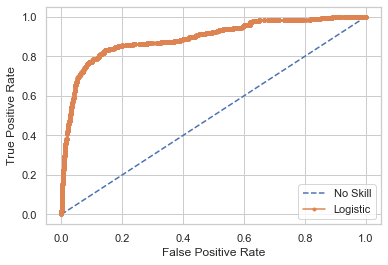

In [59]:
from matplotlib import pyplot
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [11]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf4 = LogisticRegression(C=0.01, class_weight='none', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    #X_train = X[train_indices]
    #y_train = y[train_indices]
    
    #X_test = X[test_indices]
   # y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf4.fit(X_train,y_train)  # train object
    y_hat = lr_clf4.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

====Iteration 0  ====
accuracy 0.83645
confusion matrix
 [[14616   910]
 [ 2361  2113]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


====Iteration 1  ====
accuracy 0.83645
confusion matrix
 [[14616   910]
 [ 2361  2113]]
====Iteration 2  ====
accuracy 0.83645
confusion matrix
 [[14616   910]
 [ 2361  2113]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Classifier Estimation

In [0]:
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X_train, y_train, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']

    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X, y, cv):
    
    #Perform cross validation 
    from sklearn.model_selection import cross_val_predict
    predictions = cross_val_predict(classifierEstimator, X_train, y_train, cv=cv)
    
      #model evaluation 
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    #pass true test set values and predictions to classification_report
    classReport = classification_report(y_train, predictions)
    confMat = confusion_matrix(y_train,predictions)
    acc = accuracy_score(y_train,predictions)
    
    print (classReport)
    print (confMat)
    print (acc)

In [24]:
#Use the best parameters for our Linear Regression object
classifierEst = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst, X_train, y_train, cv)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

The average accuracy for all cv folds is: 			 0.8476
The average precision for all cv folds is: 			 0.71098
The average recall for all cv folds is: 			 0.54831
*********************************************************
Cross Validation Fold Mean Error Scores


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Accuracy,Precision,Recall
0,0.854125,0.680997,0.625286
1,0.845125,0.711207,0.541872
2,0.854625,0.737765,0.556781
3,0.830125,0.682889,0.476712
4,0.848875,0.722566,0.523810
5,0.851000,0.727881,0.542382
6,0.850250,0.726515,0.533964
7,0.846500,0.680837,0.584503
8,0.848750,0.720056,0.561346
9,0.846625,0.719118,0.536478


In [25]:
EvaluateClassifierEstimator2(classifierEst, X_train, y_train, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     61829
           1       0.71      0.53      0.61     18171

    accuracy                           0.84     80000
   macro avg       0.79      0.73      0.75     80000
weighted avg       0.83      0.84      0.84     80000

[[57900  3929]
 [ 8576  9595]]
0.8436875


ROC Curves and AUC in Python
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

When to Use ROC vs. Precision-Recall Curves? Generally, the use of ROC curves and precision-recall curves are as follows:

ROC curves should be used when there are roughly equal numbers of observations for each class. Precision-Recall curves should be used when there is a moderate to large class imbalance.

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logisticRegr.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.886


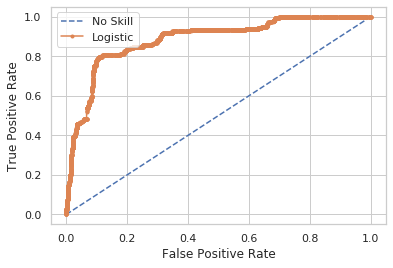

In [0]:
from matplotlib import pyplot
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]

Logistic: f1=0.579 auc=0.706


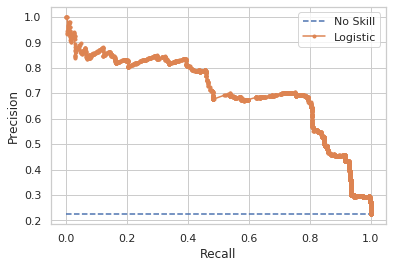

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict probabilities
lr_probs = logisticRegr .predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logisticRegr .predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]
no_skill = ycnt.values[0] / len(y_test)
#no_skill = len(y_test[y_test==1]) / len(y_test)
no_skill
#no_skill = 0.2
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = data_final.loc[:, data_final.columns != 'liquor_category_WHISKY']
y = data_final.loc[:, data_final.columns == 'liquor_category_WHISKY']

# Separating out the features
# = data.iloc[:, : 8].values
# Separating out the target
# = data.loc[:,['liquor_category_WHISKY']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
xss = StandardScaler().fit_transform(x)
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
#             , columns = ['principal component 1', 'principal component 2', '3',
#                         '4', '5'])


pca.explained_variance_ratio_
finalDf = pd.concat([principalDf, data[['liquor_category_WHISKY']]], axis = 1)

In [0]:
pca.explained_variance_ratio_

array([4.04210645e-01, 2.90581471e-01, 1.95483332e-01, 6.24617071e-02,
       4.01164982e-02, 7.11240764e-03, 3.39384042e-05, 8.16575257e-21])

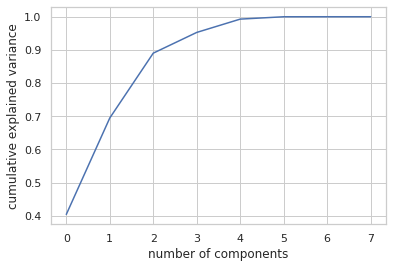

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Logistic regression with PCA

In [0]:
#x = finalDf.loc[:, finalDf.columns != 'liquor_category_WHISKY']
y = finalDf.loc[:, finalDf.columns == 'liquor_category_WHISKY']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#columns = X_train.columns

In [0]:
#X = data_final.loc[:, data_final.columns != 'liquor_category_WHISKY']
#y = data_final.loc[:, data_final.columns == 'liquor_category_WHISKY']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#columns = X_train.columns


from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = linear_model.LogisticRegressionCV(Cs=100)

logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=100, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
# Returns a NumPy Array
predictions = logisticRegr.predict(X_test)

In [0]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.84405


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print("Confusion Matrix: ", '\n', cm)

Confusion Matrix:  
 [[15049   477]
 [ 2642  1832]]


In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logisticRegr.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.884


Logistic: f1=0.540 auc=0.703


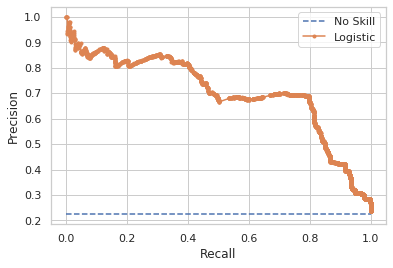

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
lr_probs = logisticRegr .predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logisticRegr .predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]
no_skill = ycnt.values[0] / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Support Vector Machine Model:

In [0]:
#possibility to scale it?
from sklearn.svm import LinearSVC
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

# all parameters not specified are set to their defaults
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
from sklearn.svm import SVC
#svclassifier = SVC(kernel='poly', degree=8)
#svclassifier = SVC(kernel='rbf')
#svclassifier = SVC(kernel='linear', random_state=0)
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
svclassifier = LinearSVC(C=100)
model = svclassifier.fit(X_std, y_train)
model

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

can adjust costs per error to help you redraw the line in different ways to find the optimial accuracy.

In [0]:
# Returns a NumPy Array
predictions = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[13093  2433]
 [  857  3617]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     15526
           1       0.60      0.81      0.69      4474

    accuracy                           0.84     20000
   macro avg       0.77      0.83      0.79     20000
weighted avg       0.86      0.84      0.84     20000



In [0]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.87365
[[14475  1051]
 [ 1476  2998]]


### Advantages  [10 points] 
Discuss the advantages of each model for each classification task. Does one
type of model offer superior performance over another in terms of prediction accuracy? In
terms of training time or efficiency? Explain in detail.  
 


###  Interpret  [30 points] 
Use the weights from logistic regression to interpret the importance of different
features for the classification task. Explain your interpretation in detail. Why do you think
some variables are more important? 

In [30]:
# interpret the weights

# iterate over the coefficients
weights2 = logisticRegr.coef_.T # take transpose to make a column vector
variable_names = X.columns
for coef, name in zip(weights2,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

sale_dollars_trans has weight of 0.6102283994348012
cost_per_liter has weight of -0.0063463490712650835
cost_per_liter_trans has weight of 0.49493828745697416
state_bottle_cost_trans has weight of 1.3850552055299956
bottles_sold_trans has weight of -0.7209331974491907
volume_sold_liters_trans has weight of 0.11529011227797659
pack has weight of 0.0009938967955783222
bottle_volume_ml has weight of -0.0016539659505486598


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt


# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
#lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
logisticRegr.fit(X_train_scaled,y_train)  # train object

y_hat = logisticRegr.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(logisticRegr.coef_.T,data_final.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.84405
[[15049   477]
 [ 2642  1832]]
bottle_volume_ml has weight of -0.3851410375320728
bottles_sold_trans has weight of -0.3595778291598138
cost_per_liter has weight of -0.2762976368132016
volume_sold_liters_trans has weight of -0.0090742223238923
pack has weight of 0.06350055374147034
sale_dollars_trans has weight of 0.3978324086239807
cost_per_liter_trans has weight of 0.5451637268256091
state_bottle_cost_trans has weight of 1.0940915468279986


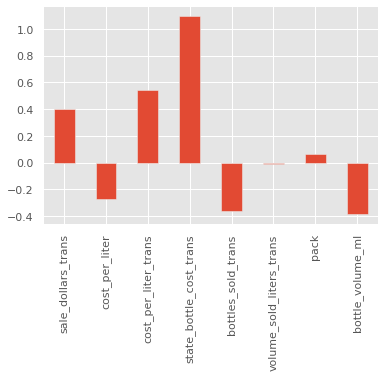

In [32]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(logisticRegr.coef_[0],index=X.columns)
weights.plot(kind='bar')
plt.show()

### Insight into the data [10 points]
Look at the chosen support vectors for the classification task. Do these provide
any insight into the data? Explain. If you used stochastic gradient descent (and therefore did
not explicitly solve for support vectors), try subsampling your data to train the SVC model—
then analyze the support vectors from the subsampled dataset. 

In [0]:
#view support vectors
model.support_vectors_

array([[ 0.04172852,  0.3721708 ,  1.1229617 , ..., -0.66089127,
        -0.70389697, -0.26280584],
       [ 0.68132163,  0.0737954 ,  0.68644563, ...,  0.13752377,
        -0.02330599, -0.26280584],
       [ 0.89149549,  0.04219618,  0.62906725, ...,  0.34659634,
        -0.70389697,  0.27676159],
       ...,
       [ 1.02543744,  0.39064988,  1.14532376, ...,  0.13752377,
        -0.70389697, -0.26280584],
       [ 0.19106698, -0.39877606, -0.7808375 , ...,  0.64126757,
        -0.02330599, -0.26280584],
       [ 0.68979404,  0.08020147,  0.69774358, ...,  0.13752377,
        -0.70389697, -0.26280584]])

In [0]:
# View indicies of support vectors
model.support_

array([    0,     9,    11, ..., 79980, 79984, 79987], dtype=int32)

This chooses all the misclassified items as a support vectors.

In [0]:
#view number of support vectors for each class
model.n_support_

array([14457, 14435], dtype=int32)

We used 14,000 instances of Whiskey and Nonwhiskey to build our decision boundary.

[[-0.61779238  0.01725721 -0.26736576  1.74130624  0.93580436 -0.34449688
   0.05279718 -0.32864875]]


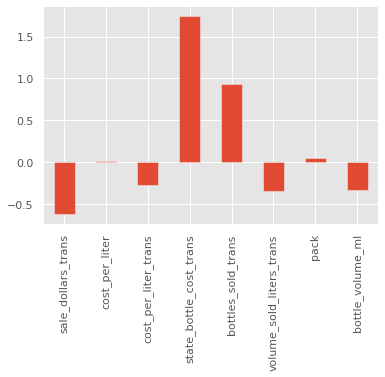

In [0]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(model.coef_)
weights3 = pd.Series(model.coef_[0],index=X_train.columns)
weights3.plot(kind='bar')

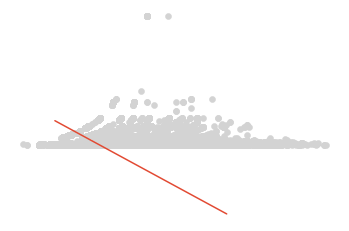

In [0]:
# Plot data points and color using their class
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_std[:,0], X_std[:,1], c=color)

# Create the hyperplane
w = svclassifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svclassifier.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();